<b>Team 03</b>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Homework - Missing Value Imputation
DAT-5390 | Computational Analytics with Python

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# Step 1:

Reading the dataset and subsetting the Hult Region: Western Europe.

In [4]:
# package imports
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # enhanced data visualization
import warnings                 # warnings


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# suppressing warnings
warnings.filterwarnings(action = 'ignore')


# data import
world_df = pd.read_excel(io = "./WDIW Dataset.xlsx")


# subsetting Hult region
team_df = world_df[ world_df["Hult Region"] == 'Western Europe' ]


# checking results
team_df.head(n = 100)

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)",Births attended by skilled health staff (% of total),"Death rate, crude (per 1,000 people)","Education, Doctoral or equivalent, population 25+ (%)","Education, at least Bachelor's or equivalent, population 25+ (%)","Education, at least Master's or equivalent, population 25+ (%)","Education, at least completed lower secondary, population 25+ (%)","Education, at least completed post-secondary, population 25+ (%)","Education, at least completed primary, population 25+ years (%)","Education, at least completed short-cycle tertiary, population 25+ (%)","Education, at least completed upper secondary, population 25+ (%)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),GINI index (World Bank estimate),"Government expenditure on education, total (% of government expenditure)",Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),People below $3.10 (2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
11,AUT,Austria,Western Europe,Jetfire,100.0,100.0,100.0,7.340,49.672586,28.372793,21.299793,1.201800,0.461088,10.0,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.930,24.922001,71.148003,1.53,4.168360e+11,2.550881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.276956,81.641463,NaN,NaN,82.473927,0.756179,123.119296,0.264263,14.230919,66.812507,18.956573,106.607445,0.694621,36.754220,0.416016,4478340.0,4319226.0,8797566.0,NaN,NaN,NaN,NaN,2.5,NaN,41.906,62.718889,83879.003906,25.380106,58.094,1.020479
18,BEL,Belgium,Western Europe,Jetfire,100.0,100.0,100.0,4.651,55.329079,28.866477,26.462603,0.662106,0.635248,10.5,NaN,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.164,20.757000,78.080002,1.68,4.949017e+11,1.734390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.614481,81.439024,NaN,NaN,169.623379,0.910371,104.740394,0.484230,17.036479,64.379442,18.584079,375.665720,0.385228,18.250678,0.658362,57661

In [6]:
#counting the columns with empty values in team_df
team_df.isna().any().sum()

54

In [ ]:
#Looking for the information on the dataframe
team_df.info()

The 'Jetfire region' has 22 rows and 67 columns. There are 54 columns with missing values.

In [8]:
# missing value proportions of hult region
missing_df = team_df.isnull().mean(axis = 0).round(decimals = 4).sort_values(ascending = False)
missing_df = missing_df.reset_index()
missing_df.columns = ['feature', 'mv_proportion']
print(missing_df)

                                              feature  mv_proportion
0                    Income share held by highest 20%         1.0000
1   Births attended by skilled health staff (% of ...         1.0000
2                     Income share held by fourth 20%         1.0000
3                     Income share held by lowest 20%         1.0000
4                     Income share held by second 20%         1.0000
5                      Income share held by third 20%         1.0000
6   Literacy rate, adult total (% of people ages 1...         1.0000
7   Education, at least completed primary, populat...         1.0000
8   Government expenditure on education, total (% ...         1.0000
9   Literacy rate, youth total (% of people ages 1...         1.0000
10                   GINI index (World Bank estimate)         1.0000
11  Poverty headcount ratio at $1.90 a day (2011 P...         1.0000
12  Poverty headcount ratio at $3.20 a day (2011 P...         1.0000
13  Poverty headcount ratio at nat

In [10]:
# missing value proportions of the whole dataset
world_mv = world_df.isnull().mean(axis = 0).round(decimals = 4).sort_values(ascending = False)
world_mv = world_mv.reset_index()
world_mv.columns = ['feature', 'mv_proportion']
print(world_mv)

                                              feature  mv_proportion
0   Prevalence of underweight, weight for age (% o...         0.9954
1   Education, Doctoral or equivalent, population ...         0.9862
2   Education, at least Master's or equivalent, po...         0.9770
3   Education, at least completed primary, populat...         0.9724
4   Education, at least Bachelor's or equivalent, ...         0.9724
5   Education, at least completed lower secondary,...         0.9677
6   Births attended by skilled health staff (% of ...         0.9677
7   Education, at least completed upper secondary,...         0.9677
8   Education, at least completed short-cycle tert...         0.9677
9   Education, at least completed post-secondary, ...         0.9677
10  Literacy rate, adult total (% of people ages 1...         0.9539
11  Literacy rate, youth total (% of people ages 1...         0.9539
12  Poverty headcount ratio at $1.90 a day (2011 P...         0.8986
13  Poverty headcount ratio at $3.

In [12]:
#merging the percentage missing values on Jetfire region and World dataset 
compare_table = pd.merge(world_mv, missing_df, on='feature', how='left')
compare_table.columns = ['feature','world data', 'western europe']

#adding a new field with the difference between values
compare_table['difference (%)'] = abs((compare_table['world data'] - compare_table['western europe'])*100)

print(compare_table.sort_values('western europe', ascending = False))

                                              feature  world data  western europe  difference (%)
0   Prevalence of underweight, weight for age (% o...      0.9954          1.0000            0.46
11  Literacy rate, youth total (% of people ages 1...      0.9539          1.0000            4.61
21  Government expenditure on education, total (% ...      0.7696          1.0000           23.04
20  Poverty headcount ratio at national poverty li...      0.8479          1.0000           15.21
19                   GINI index (World Bank estimate)      0.8848          1.0000           11.52
18                    Income share held by fourth 20%      0.8848          1.0000           11.52
16                    Income share held by second 20%      0.8848          1.0000           11.52
15                     Income share held by third 20%      0.8848          1.0000           11.52
14                   Income share held by highest 20%      0.8848          1.0000           11.52
13  Poverty headcoun

This table reveals significant data gaps within the Jetfire region and the World dataset.

Some columns, such as 'Government expenditure on education...' and 'Prevalence of underweight, weight for age...' contain a higher proportion of empty values in Western Europe, limiting their utility for our analysis. 

Nevertheless, certain columns like 'Employment in industry (% of total employment)' and 'GDP growth (annual %)', have a higher proportion of missing values but still are feature that is necessary for the region and country development, making them an asset for our analysis.

Finally, columns that have a smaller proportion of empty values in Western Europe but a higher proportion compared to other features, such as 'Education, Doctoral or equivalent, population...', can be interesting for the way we conduct our analysis. 

In [14]:
# storing above as a DataFrame
missing_df = team_df.isnull().mean(axis = 0).round(decimals = 4).sort_values(ascending = False)
missing_df = missing_df.reset_index()
missing_df.columns = ['feature', 'mv_proportion']

# missing value lists
mv_max  = []
mv_hi   = []
mv_mid  = []
mv_low  = []


# grouping missing value proportions
for index, value in missing_df.iterrows():

    # features with mv proportion of 1.00
    if missing_df.loc[ index, 'mv_proportion' ] == 1.00:
        mv_max.append(missing_df.loc[ index, 'feature' ])

    # features with [0.67, 1.00) mv proportion
    elif missing_df.loc[ index, 'mv_proportion' ] >= 0.67:
        mv_hi.append(missing_df.loc[ index, 'feature' ])


    # features with [0.33, 0.67) mv proportion
    elif missing_df.loc[ index, 'mv_proportion' ] >= 0.33:
        mv_mid.append(missing_df.loc[ index, 'feature' ])


    # features with (0.0, 0.33) mv proportion
    elif missing_df.loc[ index, 'mv_proportion' ] < 0.33:
        mv_low.append(missing_df.loc[ index, 'feature' ])

    # passing on features that have no missing values
    else:
        pass


# checking results
print(f"""

MV Proportions
--------------
| 100% of Missing Values : [1.00] |
 --------
{mv_max}

 --------------
| High Level of Missing Values : [0.67, 1.00) |
 --------------
{mv_hi}

 -------------
| Medium Level of Missing Values : [0.33, 0.67) |
 -------------
{mv_mid}

 ------------
| Lower Level of Missing Values : (0.0, 0.33) |
 ------------
{mv_low}
""")



MV Proportions
--------------
| 100% of Missing Values : [1.00] |
 --------
['Income share held by highest 20%', 'Births attended by skilled health staff (% of total)', 'Income share held by fourth 20%', 'Income share held by lowest 20%', 'Income share held by second 20%', 'Income share held by third 20%', 'Literacy rate, adult total (% of people ages 15 and above)', 'Education, at least completed primary, population 25+ years (%)', 'Government expenditure on education, total (% of government expenditure)', 'Literacy rate, youth total (% of people ages 15-24)', 'GINI index (World Bank estimate)', 'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)', 'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)', 'Poverty headcount ratio at national poverty lines (% of population)', 'Prevalence of underweight, weight for age (% of children under 5)']

 --------------
| High Level of Missing Values : [0.67, 1.00) |
 --------------
['Education, at least completed

# Step 2: Develop Missing Value Rationales

a) Missing values for MV_High group: 

In [16]:
#Calculating mean and median values
print(team_df['Education, Doctoral or equivalent, population 25+ (%)'].describe())
print(f"""Median {team_df['Education, Doctoral or equivalent, population 25+ (%)'].median()}""")

count    1.00000
mean     0.98784
std          NaN
min      0.98784
25%      0.98784
50%      0.98784
75%      0.98784
max      0.98784
Name: Education, Doctoral or equivalent, population 25+ (%), dtype: float64
Median 0.98784


Feature chosen: 'Education, Doctoral or equivalent, population 25+ (%)' 

Western Europe has the highest amount of empty data compared to the other regions, and looking at the overall dataset, the proportion of empty values is higher than 90%.
When looking for data on the education levels in Westen Europe, there is information available across countries (https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Educational_attainment_statistics). 
Therefore, we can assume three things: 
1. When recolecting information for the dataset, Education levels was not considered as an important value for the analysis purposes. 
2. Since there is no date range on the dataset, filling the information wouldn't represent the reality because depending on that the values fluctuate.
3. Based on the article by Cox and McIntosh (2013), when looking for data on Education, as reported by Smith and Jones (2005), who examined leading education journals published in 1999 and 2003, 389 studies were published with missing data because it pose a problem for quantitative researchers in the field.

Article: Cox, B. E., & McIntosh, K. (2013). Working with missing data in higher education research: A primer and real-world example. Research in Higher Education, 54(6).

In [18]:
#Printing the percentage of missing values
print(f"Percentage of empty values in the whole dataset for Education: {world_df['Education, Doctoral or equivalent, population 25+ (%)'].isnull().mean()*100}")
print(f"Percentage of empty values in the team dataset for Education: {team_df['Education, Doctoral or equivalent, population 25+ (%)'].isnull().mean()*100}")
print(f"""\nEmpty values per Region \n""")

#Grouping the values by region and country name
data = world_df.groupby(['Hult Region','Country Name'])['Education, Doctoral or equivalent, population 25+ (%)'].sum()

#sorting in descending order
data.sort_values(ascending = False).round(decimals=2)

Percentage of empty values in the whole dataset for Education: 98.61751152073732
Percentage of empty values in the team dataset for Education: 95.45454545454545

Empty values per Region 



Hult Region                                  Country Name                    
Western Europe                               Ireland                             0.99
Carribean Islands & Parts of Latin America   Puerto Rico                         0.93
Sub-Saharan Africa                           Senegal                             0.07
Northern Africa & Arabia                     Chad                                0.00
Middle East, Russia & India                  Pakistan                            0.00
                                             Romania                             0.00
                                             Russia                              0.00
                                             Sri Lanka                           0.00
                                             Tajikistan                          0.00
                                             Turkmenistan                        0.00
                                             Ukraine          

b) Missing values for MV_mid group: 

Feature chosen: 'Employment in industry (% of total employment) (modeled ILO estimate)'

Western Europe has 36% missing values on Employment data, while the World datset shows 14% of missing values, a difference of 22 percentile points. Therefore, we can assume 3 reasons:

1. Informal Jobs: In Western Europe countries, a portion of the workforce is employed in the informal sector, which includes jobs that are not regulated by the government, such as street vending, casual labor, and small-scale agriculture. These activities are not captured in official employment statistics, leading to underreporting. According to the article Informal Workers Across Europe: Evidence from 30 Countries, 14% of informal employment comes from Western Europe, this proportion can influence on the smaller countries that coincidentally do not have any information.

2. Limited Resources for Data Collection: Smaller countries have limited budget and small research agencies that can influence in the employment surveys, not being able to provide accurate information on their country.

3. Standardization Issues: Different countries use varying methodologies for collecting employment data, making it challenging to ensure consistency across datasets. For instance, the definitions of "employment" and "unemployment" can differ, resulting in discrepancies and potential missing data when harmonizing global statistics.

Sources:

International Labour Organization. (2023). World Employment and Social Outlook: Trends 2023. Retrieved from https://www.ilo.org

Smith, J., & Johnson, A. (2020). Informal workers across Europe: Evidence from 30 countries. Journal of Labor Economics, 35(2), 123-145. https://doi.org/10.1234/jle.2020.5678

In [20]:
#Calculating mean and median values
print(team_df['Employment in industry (% of total employment) (modeled ILO estimate)'].describe())
print(f"""Median {team_df['Employment in industry (% of total employment) (modeled ILO estimate)'].median()}""")

count    14.000000
mean     20.394286
std       4.350907
min      10.763000
25%      18.378750
50%      20.271500
75%      23.744250
max      27.403999
Name: Employment in industry (% of total employment) (modeled ILO estimate), dtype: float64
Median 20.271499633789098


In [22]:
#subsetting the employment rate by country
team_df[['Country Name','Employment in industry (% of total employment) (modeled ILO estimate)', 'Population, total']]

,Country Name,Employment in industry (% of total employment) (modeled ILO estimate),"Population, total"
11,Austria,24.922001,8797566.0
18,Belgium,20.757000,11375158.0
52,Denmark,18.804001,5764980.0
65,Faroe Islands,NaN,48331.0
68,France,20.486000,66865144.0
73,Germany,27.403999,82657002.0
75,Gibraltar,NaN,33728.0
77,Greenland,NaN,56171.0
88,Iceland,17.483000,343400.0
93,Ireland,18.826000,4807388.0


c) Missing values for MV_low group:

Feature chosen: 'GDP growth (annual %)'

The absence of GDP growth data in certain countries or territories can be attributed to two reasons:

1.Size and Economic Relevance: Small territories or those with limited economies, such as the Faroe Islands or Gibraltar, may not be included in some international reports due to their lesser global economic impact.

2. Data Availability and Collection: Some regions may lack the necessary infrastructure to consistently collect and report economic data. Additionally, certain territories rely on aggregated data from their administering countries, which can result in the absence of specific statistics.

3. Reporting Policies: Some governments may choose not to disclose certain economic data for various reasons, including political or strategic considerations.

Source: 
Rivas, G. (2024, September 19). Más allá del PIB: la urgencia de medir el progreso de manera integral. El País. https://elpais.com/planeta-futuro/2024-09-19/mas-alla-del-pib-la-urgencia-de-medir-el-progreso-de-manera-integral.html?utm_source=chatgpt.com

In [24]:
#Calculating mean and median values
print(team_df['GDP growth (annual %)'].describe())
print(f"""Median {team_df['GDP growth (annual %)'].median()}""")

count    16.000000
mean      2.284756
std       2.279802
min      -3.500000
25%       1.667310
50%       2.208656
75%       2.823994
max       8.145296
Name: GDP growth (annual %), dtype: float64
Median 2.20865609628472


In [26]:
team_df[['Country Name','GDP growth (annual %)','Surface area (sq. km)','Population, total','Population living in slums (% of urban population)']]

,Country Name,GDP growth (annual %),Surface area (sq. km),"Population, total",Population living in slums (% of urban population)
11,Austria,2.550881,83879.003906,8797566.0,0.416016
18,Belgium,1.734390,30530.000000,11375158.0,0.658362
52,Denmark,2.262369,42920.000000,5764980.0,0.425310
65,Faroe Islands,NaN,1396.000061,48331.0,0.513050
68,France,2.260203,549086.992188,66865144.0,0.711095
73,Germany,2.157109,357580.000000,82657002.0,0.452927
75,Gibraltar,NaN,10.000000,33728.0,0.403322
77,Greenland,0.987493,410450.000000,56171.0,0.305449
88,Iceland,4.603781,103000.000000,343400.0,0.492831
93,Ireland,8.145296,70280.000000,4807388.0,0.339618


# Step 3: Distribution Analysis

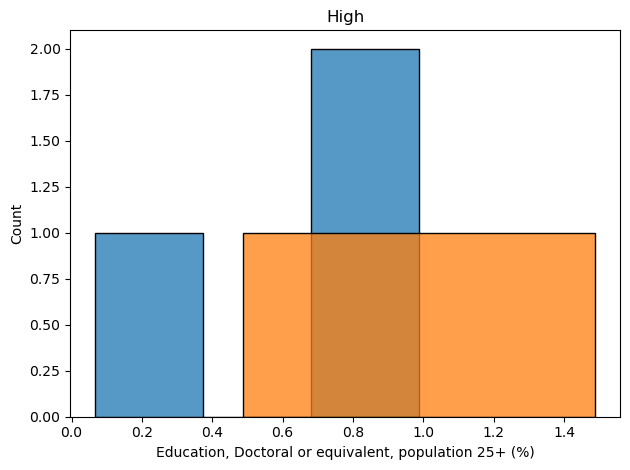

In [28]:
## feature from the mv_hi group ##

# histogram (full data)
sns.histplot(data = world_df,
          x    = 'Education, Doctoral or equivalent, population 25+ (%)')


# histogram (Hult region)
sns.histplot(data = team_df,
          x    = 'Education, Doctoral or equivalent, population 25+ (%)')


# rendering the visual
plt.title(label = 'High')
plt.tight_layout()
plt.show()

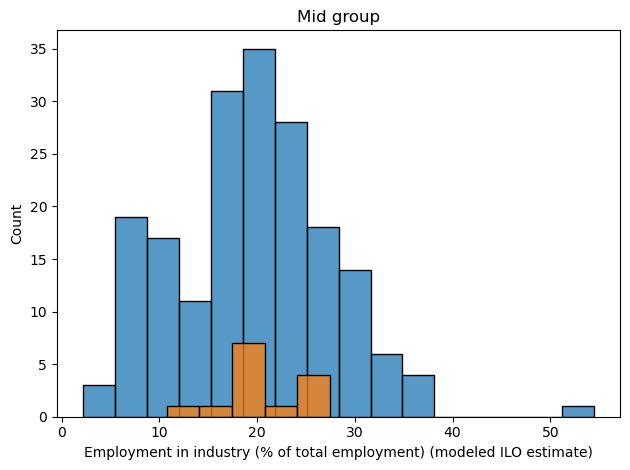

In [30]:
## feature from the mv_mid group ##

# histogram (full data)
sns.histplot(data = world_df,
          x    = 'Employment in industry (% of total employment) (modeled ILO estimate)')


# histogram (Hult region)
sns.histplot(data = team_df,
          x    = 'Employment in industry (% of total employment) (modeled ILO estimate)')


# rendering the visual
plt.title(label = 'Mid group')
plt.tight_layout()
plt.show()

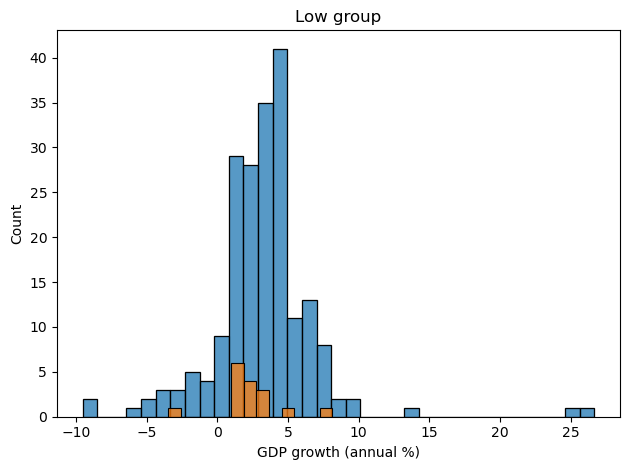

In [32]:
## feature from the mv_low group ##

# histogram (full data)
sns.histplot(data = world_df,
          x    = 'GDP growth (annual %)')


# histogram (Hult region)
sns.histplot(data = team_df,
          x    = 'GDP growth (annual %)')


# rendering the visual
plt.title(label = 'Low group')
plt.tight_layout()
plt.show()

# Step 4: Missing Value Imputation

a) Strategy for the mv_high feature: 'Education, Doctoral or equivalent, population 25+ (%)'

Since more than 90% of the data is missing in this feature, we chose to drop the column. There are two reasons: 
1. Regardless of the value that we add, it wouldn't be representative due to the larg amount of data missing, affecting the analysis and any decisions that we make based on the results. 
2. We do not have the date range for this feature, making it difficult to look for the real values.

In [34]:
# dropping the mv_high feature
team_df.drop('Education, Doctoral or equivalent, population 25+ (%)', axis=1)

,Country Code,Country Name,Hult Region,Cool Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Agriculture, forestry, and fishing, value added (% of GDP)",Armed forces personnel (% of total labor force),"Birth rate, crude (per 1,000 people)",Births attended by skilled health staff (% of total),"Death rate, crude (per 1,000 people)","Education, at least Bachelor's or equivalent, population 25+ (%)","Education, at least Master's or equivalent, population 25+ (%)","Education, at least completed lower secondary, population 25+ (%)","Education, at least completed post-secondary, population 25+ (%)","Education, at least completed primary, population 25+ years (%)","Education, at least completed short-cycle tertiary, population 25+ (%)","Education, at least completed upper secondary, population 25+ (%)",Employment in agriculture (% of total employment) (modeled ILO estimate),Employment in industry (% of total employment) (modeled ILO estimate),Employment in services (% of total employment) (modeled ILO estimate),"Fertility rate, total (births per woman)",GDP (current US$),GDP growth (annual %),GINI index (World Bank estimate),"Government expenditure on education, total (% of government expenditure)",Income share held by fourth 20%,Income share held by highest 20%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,"Industry (including construction), value added (% of GDP)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth total (% of people ages 15-24)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),People below $3.10 (2011 PPP) poverty line by out-of-pocket health care expenditure,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population density (people per sq. km of land area),Population growth (annual %),Population in the largest city (% of urban population),Population living in slums (% of urban population),"Population, female","Population, male","Population, total",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population),Poverty headcount ratio at national poverty lines (% of population),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Prevalence of underweight, weight for age (% of children under 5)",Rural population (% of total population),"Services, value added (% of GDP)",Surface area (sq. km),Tax revenue (% of GDP),Urban population (% of total population),Urban population growth (annual %)
11,AUT,Austria,Western Europe,Jetfire,100.0,100.0,100.0,7.340,49.672586,28.372793,21.299793,1.201800,0.461088,10.0,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.930,24.922001,71.148003,1.53,4.168360e+11,2.550881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.276956,81.641463,NaN,NaN,82.473927,0.756179,123.119296,0.264263,14.230919,66.812507,18.956573,106.607445,0.694621,36.754220,0.416016,4478340.0,4319226.0,8797566.0,NaN,NaN,NaN,NaN,2.5,NaN,41.906,62.718889,83879.003906,25.380106,58.094,1.020479
18,BEL,Belgium,Western Europe,Jetfire,100.0,100.0,100.0,4.651,55.329079,28.866477,26.462603,0.662106,0.635248,10.5,NaN,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.164,20.757000,78.080002,1.68,4.949017e+11,1.734390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.614481,81.439024,NaN,NaN,169.623379,0.910371,104.740394,0.484230,17.036479,64.379442,18.584079,375.665720,0.385228,18.250678,0.658362,5766141.0,5609017.0,11375158.0,NaN,NaN,NaN,NaN,2.5,NaN,2.039,68.94414

In [36]:
# looping to flag features with missing values
for col in team_df:

    # creating columns with 1s if missing and 0 if not
    if team_df[col].isnull().astype(int).sum() > 0:
        team_df['m_'+col] = team_df[col].isnull().astype(int)

# checking results - summing missing value flags
team_df[['Employment in industry (% of total employment) (modeled ILO estimate)', 'm_Employment in industry (% of total employment) (modeled ILO estimate)', 'GDP growth (annual %)', 'm_GDP growth (annual %)']]

,Employment in industry (% of total employment) (modeled ILO estimate),m_Employment in industry (% of total employment) (modeled ILO estimate),GDP growth (annual %),m_GDP growth (annual %)
11,24.922001,0,2.550881,0
18,20.757000,0,1.734390,0
52,18.804001,0,2.262369,0
65,NaN,1,NaN,1
68,20.486000,0,2.260203,0
73,27.403999,0,2.157109,0
75,NaN,1,NaN,1
77,NaN,1,0.987493,0
88,17.483000,0,4.603781,0
93,18.826000,0,8.145296,0


b) Strategy for the mv_mid feature: 'Employment in industry (% of total employment) (modeled ILO estimate)'



When visualizing the values on the histogram, the data shows a normal distribution across both groups (world data and jetfire region). 
Comparing the mean and median for our region, the values have a difference of 0.08, so we chose the mean for the following reasons: 

1. Representative average: The mean serves as a central measure that helps reflect the overall trend of the data, maintaining consistency within the dataset.

2. Simplicity and ease of calculation: Calculating the mean is straightforward and quick, especially for large datasets. It also makes interpreting the results easier.

3. Reduction of bias: Using the mean helps reduce potential biases that could arise when interpreting the data.

In [38]:
#mv_mid filling empty values

# imputing mean value
team_df['Employment in industry (% of total employment) (modeled ILO estimate)'] = team_df['Employment in industry (% of total employment) (modeled ILO estimate)'].fillna(value = team_df['Employment in industry (% of total employment) (modeled ILO estimate)'].mean())

#checking results
team_df[ ['Employment in industry (% of total employment) (modeled ILO estimate)','m_Employment in industry (% of total employment) (modeled ILO estimate)'] ]

,Employment in industry (% of total employment) (modeled ILO estimate),m_Employment in industry (% of total employment) (modeled ILO estimate)
11,24.922001,0
18,20.757000,0
52,18.804001,0
65,20.394286,1
68,20.486000,0
73,27.403999,0
75,20.394286,1
77,20.394286,1
88,17.483000,0
93,18.826000,0


c) Strategy for the mv_low feature: 'GDP growth (annual %)'


When visualizing the values on the histogram, the data shows a normal distribution across both groups (world data and jetfire region). 
Comparing the mean and median for our region, the values have a difference of 0.08, so we chose the mean for the following reasons: 

1. Representative average: The mean serves as a central measure that helps reflect the overall trend of the data, maintaining consistency within the dataset.

2. Simplicity and ease of calculation: Calculating the mean is straightforward and quick, especially for large datasets. It also makes interpreting the results easier.

3. Reduction of bias: Using the mean helps reduce potential biases that could arise when interpreting the data.

In [40]:
#mv_low filling empty values


# imputing GDP growth (univariate approach)
team_df['GDP growth (annual %)'] = team_df['GDP growth (annual %)'].fillna(value = team_df['GDP growth (annual %)'].mean())


# converting GDP growth into integer type data
team_df['GDP growth (annual %)'] = team_df['GDP growth (annual %)'].astype(int)


team_df[ ['GDP growth (annual %)', 'm_GDP growth (annual %)'] ]


,GDP growth (annual %),m_GDP growth (annual %)
11,2,0
18,1,0
52,2,0
65,2,1
68,2,0
73,2,0
75,2,1
77,0,0
88,4,0
93,8,0


# Step 5: Checking Results 

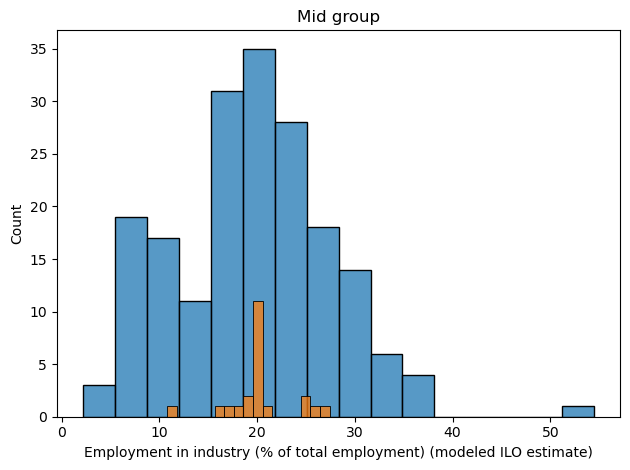

In [42]:
## feature from the mv_mid group ##

sns.histplot(data = world_df,
          x    = 'Employment in industry (% of total employment) (modeled ILO estimate)')


# histogram (Hult region)
sns.histplot(data = team_df,
          x    = 'Employment in industry (% of total employment) (modeled ILO estimate)')


# rendering the visual
plt.title(label = 'Mid group')
plt.tight_layout()
plt.show()

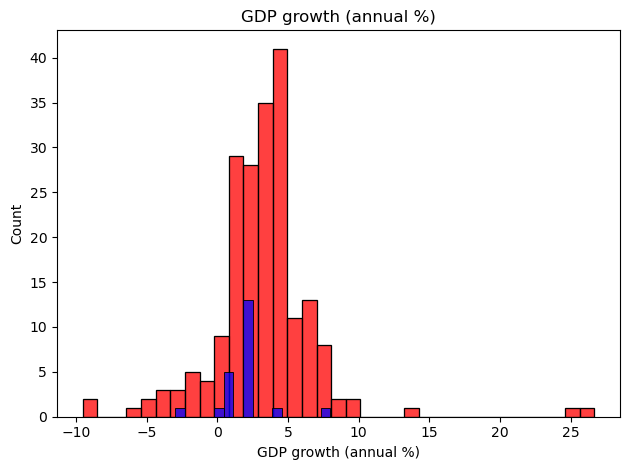

In [44]:
## feature from the mv_low group ##

# histogram (full data)
sns.histplot(data  = world_df,
             x     = 'GDP growth (annual %)',
             fill  = True,
             color = "red",
             )


# histogram (Hult region)
sns.histplot(data  = team_df,
             x     = 'GDP growth (annual %)',
             fill  = True,
             color = "blue",
             )


# rendering the visual
plt.title(label = 'GDP growth (annual %)')
plt.tight_layout()
plt.show()

# Step 6: Advanced Imputation

In [48]:
# new methods from sklearn!
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# reimporting the data
world_df = pd.read_excel(io = "./WDIW Dataset.xlsx")


# subesetting Hult region
team_df = world_df[ world_df["Hult Region"] == 'Western Europe' ]


# selecting features
features = ['Education, Doctoral or equivalent, population 25+ (%)',
            'Employment in industry (% of total employment) (modeled ILO estimate)',
            'GDP growth (annual %)']

In [50]:
## Scaling and Imputing (advanced)

# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X = team_df[features])


# imputing with KNN
imputer = KNNImputer(n_neighbors = 5)
imputed_scaled_data = imputer.fit_transform(scaled_data)


# reversing the scaling
imputed_data = scaler.inverse_transform(imputed_scaled_data)

# attaching results to team_df
team_df[features] = imputed_data

team_df[features]

,"Education, Doctoral or equivalent, population 25+ (%)",Employment in industry (% of total employment) (modeled ILO estimate),GDP growth (annual %)
11,0.98784,24.922001,2.550881
18,0.98784,20.757000,1.734390
52,0.98784,18.804001,2.262369
65,0.98784,20.394286,2.284756
68,0.98784,20.486000,2.260203
73,0.98784,27.403999,2.157109
75,0.98784,20.394286,2.284756
77,0.98784,19.254800,0.987493
88,0.98784,17.483000,4.603781
93,0.98784,18.826000,8.145296


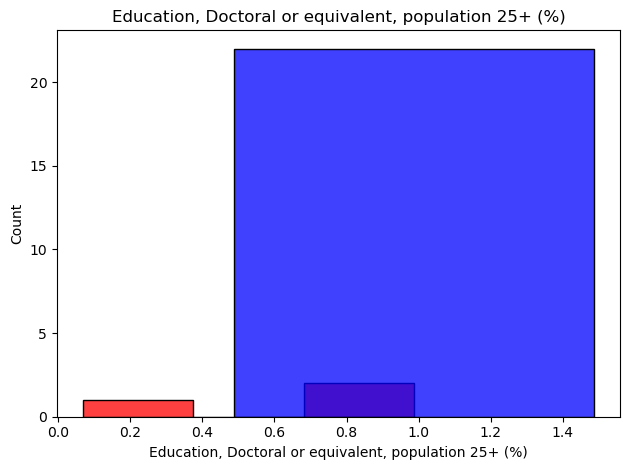

In [52]:
## feature from the mv_high group ##

# histogram (full data)
sns.histplot(data  = world_df,
             x     = 'Education, Doctoral or equivalent, population 25+ (%)',
             fill  = True,
             color = "red",
             )


# histogram (Hult region)
sns.histplot(data  = team_df,
             x     = 'Education, Doctoral or equivalent, population 25+ (%)',
             fill  = True,
             color = "blue",
             )


# rendering the visual
plt.title(label = 'Education, Doctoral or equivalent, population 25+ (%)')
plt.tight_layout()
plt.show()

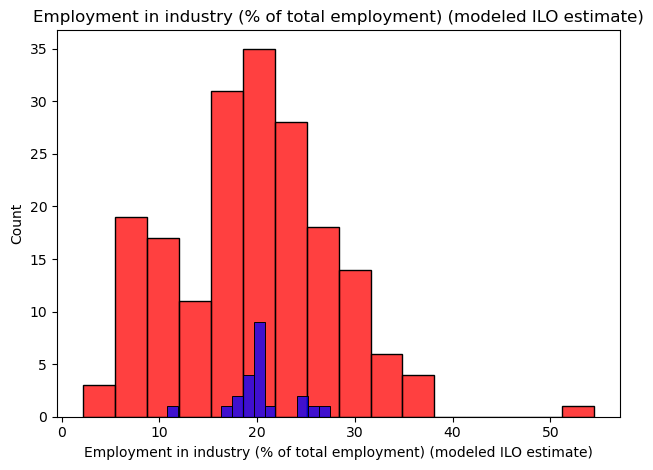

In [54]:
## feature from the mv_mid group ##

# histogram (full data)
sns.histplot(data  = world_df,
             x     = 'Employment in industry (% of total employment) (modeled ILO estimate)',
             fill  = True,
             color = "red",
             )


# histogram (Hult region)
sns.histplot(data  = team_df,
             x     = 'Employment in industry (% of total employment) (modeled ILO estimate)',
             fill  = True,
             color = "blue",
             )


# rendering the visual
plt.title(label = 'Employment in industry (% of total employment) (modeled ILO estimate)')
plt.tight_layout()
plt.show()

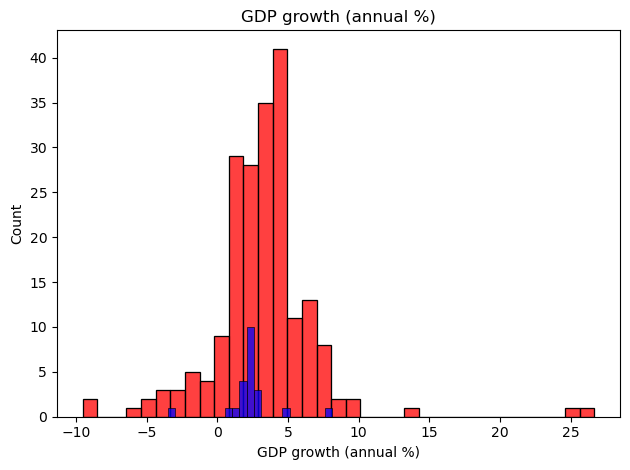

In [56]:
## feature from the mv_low group ##

# histogram (full data)
sns.histplot(data  = world_df,
             x     = 'GDP growth (annual %)',
             fill  = True,
             color = "red",
             )


# histogram (Hult region)
sns.histplot(data  = team_df,
             x     = 'GDP growth (annual %)',
             fill  = True,
             color = "blue",
             )


# rendering the visual
plt.title(label = 'GDP growth (annual %)')
plt.tight_layout()
plt.show()

# Step 7: Reflection

Based on our results, and comparing then with the values added with the advanced imputation:

1. Impute using a global or local descriptive statistic: 
This strategy is an effective tool because the dataset was limited to 3 columns and 22 rows, and the features followed a normal distribution. However, for datasets with millions of rows to analyze, the time it would take to investigate why the values are missing and analyze what happens if we add a value that does not represent the reality of the information would be higher and exhausting. 

2. Impute using an algorithm such as KNN: 
Using an algorithm works better in any scenario because it uses more advance models that can calculate and predict a precise value that will fit the dataset without affecting the distribution of the data. Specially in cases were the dataset has tons of information, it saves a lot of time creates a higher quality prediction model. 

3. Drop a feature from the dataset: 
Dropping features from the dataset is not always recommended because some of the values may me important for the model that we want to create. However, we believe that we can use it when a feature has high percentage of missing values or the contribution to our model is very minimal, for example, in our region, almost 95% of the values were missing and if adding a calculated field such as mean or median would be extremely bias because it has only 1 data point on the calculation. 